# Boolean Indexing with Pandas Cookbook 

In [85]:
# import packages we need for exploratory data analysis (EDA)
# to store tabular data
import pandas as pd
# to do some math
import numpy as np
# a popular data visualization tool
import matplotlib.pyplot as plt
# another popular data visualization tool
import seaborn as sns
# allows the notebook to render graphics
%matplotlib inline
# a popular data visualization theme
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [86]:
path = 'D:\\ml_code\\data_science\\pandas\\Pandas_Code\\data\\'

In [87]:
def get_df(csv_name):
    df = pd.read_csv(path+csv_name)
    return df

In [88]:
movie = get_df('movie.csv')

In [89]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Determine whether the duration of each movie is longer than two hours by using
the greater than comparison operator with the duration Series

In [90]:
movie_2_hours = movie.duration > 120
movie_2_hours.head(10)

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7    False
8     True
9     True
Name: duration, dtype: bool

In [91]:
#movies > 2 hours long
movie_2_hours.sum()

1039

In [92]:
#% of movies > 2 hours
movie_2_hours.mean()

0.2113506916192026

In [93]:
#some movies have null duration
movie[movie.duration.isnull()]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
197,Color,Matt Birch,1.0,NaN,0.0,159.0,Dave Legeno,10000.0,NaN,Action|Fantasy,...,2.0,English,UK,NaN,NaN,2011.0,570.0,7.5,NaN,40
203,Color,Matt Birch,4.0,NaN,0.0,1000.0,Toby Jones,10000.0,NaN,Fantasy,...,2.0,English,UK,NaN,NaN,2010.0,2000.0,6.4,NaN,25
1495,Color,Tony Kaye,NaN,NaN,194.0,816.0,Aisha Tyler,970.0,NaN,Crime|Drama,...,NaN,English,USA,NaN,23000000.0,2009.0,856.0,7.2,NaN,26
3536,Color,NaN,10.0,NaN,NaN,502.0,Tuppence Middleton,1000.0,NaN,Drama|History|Romance|War,...,44.0,English,UK,TV-14,NaN,NaN,888.0,8.2,16.00,11000
3744,Color,Marc Bennett,2.0,NaN,3.0,723.0,Natasha Henstridge,975.0,NaN,Comedy|Drama,...,2.0,English,USA,NaN,5000000.0,2012.0,900.0,6.7,NaN,35
3763,Color,Shekar,1.0,NaN,0.0,0.0,Diganth,5.0,NaN,Comedy|Romance,...,1.0,Kannada,India,NaN,NaN,2013.0,0.0,7.1,NaN,2
4207,Color,Kundan Shah,1.0,NaN,4.0,72.0,Bobby Deol,353.0,NaN,Action|Comedy|Romance|Thriller,...,1.0,Hindi,India,NaN,NaN,2000.0,89.0,2.8,NaN,10
4297,Color,David M. Matthews,5.0,NaN,8.0,394.0,Lamman Rucker,713.0,2592808.0,Crime|Drama|Thriller,...,15.0,English,USA,R,NaN,2010.0,607.0,3.5,2.35,588
4302,Color,Romesh Sharma,4.0,NaN,0.0,45.0,Revathy,421.0,129319.0,Romance,...,4.0,English,India,NaN,70000000.0,2005.0,96.0,5.1,NaN,9


In [94]:
#drop with null, other way of taking > 120
movie.duration.dropna().gt(120).mean()

0.21199755152009794

In [95]:
movie_2_hours.describe().T

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

## Constructing multiple boolean conditions


Construct multiple boolean
expressions before combining them together to find all the movies that have an
imdb_score greater than 8, a content_rating of PG-13, and a title_year either before
2000 or after 2009.

In [96]:
crit1 = movie.imdb_score > 8
crit2 = movie.content_rating == 'PG-13'
crit3 = (movie.title_year < 2000) | (movie.title_year > 2009)

In [97]:
crit_final = crit1 & crit2 & crit3

In [98]:
#create another criteria
critb1 = movie.imdb_score < 5
critb2 = movie.content_rating == 'R'
critb3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
critb_final = critb1 & critb2 & critb3

In [99]:
final_crit = crit_final | critb_final

In [100]:
movie[final_crit].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
95,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
96,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [101]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filt = movie.loc[final_crit,cols]
movie_filt.tail()

,imdb_score,content_rating,title_year
4560,4.2,R,2000.0
4576,3.1,R,2009.0
4578,8.3,PG-13,1994.0
4737,4.3,R,2010.0
4878,4.1,R,2007.0


In [102]:
final_crit.head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [103]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Replicating boolean indexing with index selection


Use the college dataset to select all institutions from a particular state
with both boolean indexing and index selection and then compare each of their
performance against one another.

In [104]:
college = get_df('college.csv')

In [105]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [106]:
#Read in the college dataset and use boolean indexing to select all institutions
#from the state of Texas (TX)

college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [107]:
#To replicate this using index selection, we need to move the STABBR column into
#the index. We can then use label-based selection with the .loc indexer:

college2 = college.set_index('STABBR')
college2.head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
AL,Alabama A & M University,Normal,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
AL,University of Alabama at Birmingham,Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
AL,Amridge University,Montgomery,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
AL,University of Alabama in Huntsville,Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
AL,Alabama State University,Montgomery,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [108]:
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


## Selecting with unique and sorted indexes

we use the college dataset to form unique or sorted indexes to increase the
performance of index selection. 

In [109]:
college2 = college.set_index('STABBR')
#is the index  sorted 
college2.index.is_monotonic

False

In [110]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [111]:
%timeit college[college['STABBR'] == 'TX']

858 µs ± 16.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [112]:
%timeit college2.loc['TX']

371 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [113]:
#faster with sorted index
%timeit college3.loc['TX']

127 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The sorted index performs nearly an order of magnitude faster than boolean
selection. Let's now turn towards unique indexes. For this, we use the institution
name as the index:

In [114]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [115]:
#select standford with boolean and sorted index

%timeit college[college['INSTNM'] == 'Stanford University']

%timeit college_unique.loc['Stanford University']

765 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
103 µs ± 885 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Gaining perspective on stock prices
Examine Schlumberger stock from the start of 2010 until mid-2017. We use
boolean indexing to extract a Series of the lowest and highest ten percent of closing prices
during this time period. We then plot all points and highlight those that are in the upper
and lower ten percent.


In [116]:
slb = pd.read_csv(path+'slb_stock.csv', index_col='Date', parse_dates=['Date'])

In [117]:
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [118]:
slb.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1895.0,7.912461e+01,1.177559e+01,53.72,71.405,77.99,86.010,118.30
High,1895.0,7.996413e+01,1.176986e+01,54.01,72.160,78.80,86.935,118.76
Low,1895.0,7.823227e+01,1.176813e+01,51.67,70.545,77.24,85.150,117.35
Close,1895.0,7.912191e+01,1.176780e+01,51.75,71.320,78.00,86.125,117.95
Volume,1895.0,8.116428e+06,4.234311e+06,1730729.00,5652527.500,7249395.00,9387764.500,87133565.00


In [119]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1,.9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [120]:
#Using boolean selection, select all closing prices in the upper or lower tenth percentile:
slb_summary.index

Index(['count', 'mean', 'std', 'min', '10%', '50%', '90%', 'max'], dtype='object')

In [121]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)

In [122]:
slb_top_bottom_10 = slb_close[criteria]
slb_top_bottom.shape

(380,)

Plot the resulting filtered Series in light gray on top of all closing prices in black.
Use the matplotlib library to draw horizontal lines at the tenth and ninetieth
percentiles

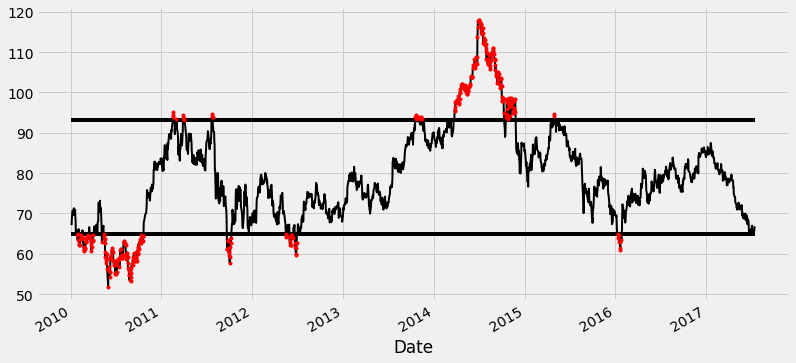

In [123]:
slb_close.plot(color='black',figsize=(12,6),linewidth=2)
slb_top_bottom_10.plot(marker='o',style=' ',ms=4,color='red',markersize=3)
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10,upper_10],xmin=xmin,xmax=xmax,color='black');

## Determining the normality of stock market returns

Find daily stock market returns of the internet retail giant
Amazon and informally test whether they follow a normal distribution

In [128]:
amzn = pd.read_csv(path+'amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [129]:
#Create a Series by selecting only the closing price and then using the pct_change method to get the daily rate of return:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

In [131]:
amzn_daily_return = amzn

2.3936331560345683

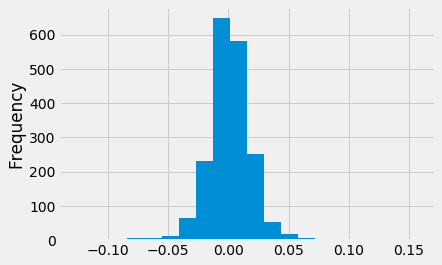

In [139]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.plot(kind='hist',bins=20);

In [144]:
#Normal distributions approximately follow the 68-95-99.7 rule--meaning that 68%
#of the data falls between 1 standard deviation of the mean, 95% between 2, and
#99.7% between 3. We will now calculate the percentage of daily returns that fall
#between 1, 2, and 3 standard deviations from the mean.

mean = amzn_daily_return.mean()
std = amzn_daily_return.std()

In [141]:
#Calculate the absolute value of the z-score for each observation. The z-score is the number of standard deviations
#away from the mean
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [142]:
#Find the percentage of returns that are within 1, 2, and 3 standard deviations:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. ' '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [143]:
abs_z_score

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
2010-01-12    1.207266
2010-01-13    0.632229
2010-01-14    0.749937
2010-01-15    0.146621
2010-01-19    0.122527
2010-01-20    0.785623
2010-01-21    0.272647
2010-01-22    2.127321
2010-01-25    0.527982
2010-01-26    0.410943
2010-01-27    1.314371
2010-01-28    1.281765
2010-01-29    0.311284
2010-02-01    2.689219
2010-02-02    0.381266
2010-02-03    0.354127
2010-02-04    1.399460
2010-02-05    0.566085
2010-02-08    0.303780
2010-02-09    0.453550
2010-02-10    0.349401
2010-02-11    1.107598
2010-02-12    0.243877
2010-02-16    0.959822
2010-02-17    0.586231
                ...   
2017-06-05    0.166958
2017-06-06    0.478795
2017-06-07    0.291303
2017-06-08    0.053627
2017-06-09    1.656377
2017-06-12    0.753225
2017-06-13    0.765014
2017-06-14    0.285362
2017-06-15    0.697806
2017-06-16    1.165651
2017-06-19    0.316677
2017-06-20    0.194126
2017-0